<a href="https://colab.research.google.com/github/dhender77/Drake-Mens-Basketball-2022-23/blob/main/Project1_Henderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Mounted at /content/drive


#1. Name: 

# 2. Data Description
Answer the following questions:
- Explain what dataset you chose, and why you chose it. 
- Specify which columns you are using as your __predictor variables__
- What variable are you selecting as your __target variable__? 
- In selecting this target variable, does this make your problem a __classification__ or a __regression__? 

I chose a dataset that contains data from every offensive possession from Drake Men's Basketball conference play. I chose it because I'm doing data analytics for them this season and they've been struggling on offense in conference play. My target variable is "Points scored". My predictor variables will be "opponent", "paint touches", "Player Shot Attempt", "Shot Type", and a column that tells whether or not a player is on the court (10 of these). This target variable is a regression.

# 3. Research Question
As clearly/specifcially as possible, state the question you are trying to solve in this project.
> For example, if I was working with the Iris dataset, I might ask 'how accurately can we predict the species of Iris from these 4 measurements?'

What offensive condtions will lead to the highest expected points scored on a possession?

# 4. Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

In [ ]:
# data prep code 
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import pandas as pd

path = '/content/drive/MyDrive/CS 167/Drake Offense.csv'
Drake = pd.read_csv(path)
Drake.head()

,Opponent,Player 1,Player 2,Player 3,Player 4,Player 5,Paint Touches,Player Shot Attempt,Shot Type,Possession Type,...,Tucker,Sardaar,Brodie,Sturtz,Eric,Bryce,Okay,Conor,Nate,Issa
0,Indiana State (A),Roman,DJ,Sturtz,Tucker,Brodie,1,DJ,Turnover,HC,...,Yes,No,Yes,Yes,No,No,No,No,No,No
1,Indiana State (A),Roman,DJ,Sturtz,Tucker,Brodie,1,DJ,Three,HC,...,Yes,No,Yes,Yes,No,No,No,No,No,No
2,Indiana State (A),Roman,DJ,Sturtz,Tucker,Brodie,0,Tucker,Three,HC,...,Yes,No,Yes,Yes,No,No,No,No,No,No
3,Indiana State (A),Roman,DJ,Sturtz,Tucker,Brodie,0,DJ,Three,HC,...,Yes,No,Yes,Yes,No,No,No,No,No,No
4,Indiana State (A),Roman,DJ,Sturtz,Tucker,Brodie,1,Brodie,Hook,HC,...,Yes,No,Yes,Yes,No,No,No,No,No,No


In [ ]:
Drake_Clean = Drake[["Opponent", "Paint Touches", "Player Shot Attempt", "Shot Type", "Points Scored" , "Roman", "DJ", "Tucker", "Sturtz", "Brodie", "Sardaar", "Conor", "Nate", "Okay", "Eric"]]
Drake_Clean.head()

,Opponent,Paint Touches,Player Shot Attempt,Shot Type,Points Scored,Roman,DJ,Tucker,Sturtz,Brodie,Sardaar,Conor,Nate,Okay,Eric
0,Indiana State (A),1,DJ,Turnover,0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No
1,Indiana State (A),1,DJ,Three,3,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No
2,Indiana State (A),0,Tucker,Three,0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No
3,Indiana State (A),0,DJ,Three,0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No
4,Indiana State (A),1,Brodie,Hook,0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No


In [ ]:
Drake_Clean.isna().any()

Opponent               False
Paint Touches          False
Player Shot Attempt    False
Shot Type              False
Points Scored          False
Roman                  False
DJ                     False
Tucker                 False
Sturtz                 False
Brodie                 False
Sardaar                False
Conor                  False
Nate                   False
Okay                   False
Eric                   False
dtype: bool

In [ ]:
Drake_Clean.tail()
#Looks like there's just a bunch of blanks reading in because of how far down I extended some equations, just remove these rows.

,Opponent,Paint Touches,Player Shot Attempt,Shot Type,Points Scored,Roman,DJ,Tucker,Sturtz,Brodie,Sardaar,Conor,Nate,Okay,Eric
462,UIC (A),1,DJ,Jumper,0,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
463,UIC (A),1,Sturtz,Layup,2,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
464,UIC (A),0,Conor,Three,0,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
465,UIC (A),1,Tucker,Layup,2,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
466,UIC (A),0,Tucker,Three,3,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No


In [ ]:
Drake0 = Drake_Clean.copy().dropna()
Drake0.tail()
#This removes our rows at the end

,Opponent,Paint Touches,Player Shot Attempt,Shot Type,Points Scored,Roman,DJ,Tucker,Sturtz,Brodie,Sardaar,Conor,Nate,Okay,Eric
462,UIC (A),1,DJ,Jumper,0,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
463,UIC (A),1,Sturtz,Layup,2,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
464,UIC (A),0,Conor,Three,0,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
465,UIC (A),1,Tucker,Layup,2,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No
466,UIC (A),0,Tucker,Three,3,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No


Probably need to make Player Shot Attempt, Shot Type, and Opponent into dummy variables. Only one numerical value being "Paint Touches", everything else is character. 

In [ ]:
Drake1 = pd.get_dummies(Drake0, columns=['Opponent', 'Player Shot Attempt', 'Shot Type'])
Drake1.head()

,Paint Touches,Points Scored,Roman,DJ,Tucker,Sturtz,Brodie,Sardaar,Conor,Nate,...,Player Shot Attempt_Team,Player Shot Attempt_Tucker,Shot Type_Dunk,Shot Type_Floater,Shot Type_Foul,Shot Type_Hook,Shot Type_Jumper,Shot Type_Layup,Shot Type_Three,Shot Type_Turnover
0,1,0,Yes,Yes,Yes,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,1
1,1,3,Yes,Yes,Yes,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Yes,Yes,Yes,Yes,Yes,No,No,No,...,0,1,0,0,0,0,0,0,1,0
3,0,0,Yes,Yes,Yes,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,0,1,0
4,1,0,Yes,Yes,Yes,Yes,Yes,No,No,No,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
Drake1['Roman'] = Drake1['Roman'].replace(to_replace='Yes', value=1)
Drake1['Roman'] = Drake1['Roman'].replace(to_replace='No', value=0)
Drake1['DJ'] = Drake1['DJ'].replace(to_replace='Yes', value=1)
Drake1['DJ'] = Drake1['DJ'].replace(to_replace='No', value=0)
Drake1['Tucker'] = Drake1['Tucker'].replace(to_replace='Yes', value=1)
Drake1['Tucker'] = Drake1['Tucker'].replace(to_replace='No', value=0)
Drake1['Sturtz'] = Drake1['Sturtz'].replace(to_replace='Yes', value=1)
Drake1['Sturtz'] = Drake1['Sturtz'].replace(to_replace='No', value=0)
Drake1['Brodie'] = Drake1['Brodie'].replace(to_replace='Yes', value=1)
Drake1['Brodie'] = Drake1['Brodie'].replace(to_replace='No', value=0)
Drake1['Sardaar'] = Drake1['Sardaar'].replace(to_replace='Yes', value=1)
Drake1['Sardaar'] = Drake1['Sardaar'].replace(to_replace='No', value=0)
Drake1['Conor'] = Drake1['Conor'].replace(to_replace='Yes', value=1)
Drake1['Conor'] = Drake1['Conor'].replace(to_replace='No', value=0)
Drake1['Nate'] = Drake1['Nate'].replace(to_replace='Yes', value=1)
Drake1['Nate'] = Drake1['Nate'].replace(to_replace='No', value=0)
Drake1['Okay'] = Drake1['Okay'].replace(to_replace='Yes', value=1)
Drake1['Okay'] = Drake1['Okay'].replace(to_replace='No', value=0)
Drake1['Eric'] = Drake1['Eric'].replace(to_replace='Yes', value=1)
Drake1['Eric'] = Drake1['Eric'].replace(to_replace='No', value=0)
Drake1.head() #this makes all of the player columns 1 for in the game, 0 for on the bench.



,Paint Touches,Points Scored,Roman,DJ,Tucker,Sturtz,Brodie,Sardaar,Conor,Nate,...,Player Shot Attempt_Team,Player Shot Attempt_Tucker,Shot Type_Dunk,Shot Type_Floater,Shot Type_Foul,Shot Type_Hook,Shot Type_Jumper,Shot Type_Layup,Shot Type_Three,Shot Type_Turnover
0,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
Drake2 = Drake1.copy() #make this for a non-normalized dataset
Drake2.head()

,Paint Touches,Points Scored,Roman,DJ,Tucker,Sturtz,Brodie,Sardaar,Conor,Nate,...,Player Shot Attempt_Team,Player Shot Attempt_Tucker,Shot Type_Dunk,Shot Type_Floater,Shot Type_Foul,Shot Type_Hook,Shot Type_Jumper,Shot Type_Layup,Shot Type_Three,Shot Type_Turnover
0,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
def z_score(columns, data):
    """
    takes in a list of columns to normalize using the z-score method
    Params:
        columns, a list of columns to normalize
        data, the dataframe, preferably a copy
    """
    for col in columns:
        #get the mean and std
        col_m = Drake1[col].mean()
        col_s = Drake1[col].std()
        
        data[col] = (data[col] - col_m)/col_s

In [ ]:
Drake1.columns

Index(['Paint Touches', 'Points Scored', 'Roman', 'DJ', 'Tucker', 'Sturtz',
       'Brodie', 'Sardaar', 'Conor', 'Nate', 'Okay', 'Eric',
       'Opponent_Indiana State (A)', 'Opponent_Missouri State (A)',
       'Opponent_Murray State (H)', 'Opponent_SIU (A)', 'Opponent_UIC (A)',
       'Opponent_UIC (H)', 'Opponent_Valparaiso (H)',
       'Player Shot Attempt_Brodie', 'Player Shot Attempt_Conor',
       'Player Shot Attempt_DJ', 'Player Shot Attempt_Eric',
       'Player Shot Attempt_Nate', 'Player Shot Attempt_Okay',
       'Player Shot Attempt_Roman', 'Player Shot Attempt_Sardaar',
       'Player Shot Attempt_Sturtz', 'Player Shot Attempt_Team',
       'Player Shot Attempt_Tucker', 'Shot Type_Dunk', 'Shot Type_Floater',
       'Shot Type_Foul', 'Shot Type_Hook', 'Shot Type_Jumper',
       'Shot Type_Layup', 'Shot Type_Three', 'Shot Type_Turnover'],
      dtype='object')

In [ ]:
z_score(['Paint Touches', 'Roman', 'DJ', 'Tucker', 'Sturtz',
       'Brodie', 'Sardaar', 'Conor', 'Nate', 'Okay', 'Eric',
       'Opponent_Indiana State (A)', 'Opponent_Missouri State (A)',
       'Opponent_Murray State (H)', 'Opponent_SIU (A)', 'Opponent_UIC (A)',
       'Opponent_UIC (H)', 'Opponent_Valparaiso (H)',
       'Player Shot Attempt_Brodie', 'Player Shot Attempt_Conor',
       'Player Shot Attempt_DJ', 'Player Shot Attempt_Eric',
       'Player Shot Attempt_Nate', 'Player Shot Attempt_Okay',
       'Player Shot Attempt_Roman', 'Player Shot Attempt_Sardaar',
       'Player Shot Attempt_Sturtz', 'Player Shot Attempt_Team',
       'Player Shot Attempt_Tucker', 'Shot Type_Dunk', 'Shot Type_Floater',
       'Shot Type_Foul', 'Shot Type_Hook', 'Shot Type_Jumper',
       'Shot Type_Layup', 'Shot Type_Three', 'Shot Type_Turnover'], Drake1)
Drake1.head()

,Paint Touches,Points Scored,Roman,DJ,Tucker,Sturtz,Brodie,Sardaar,Conor,Nate,...,Player Shot Attempt_Team,Player Shot Attempt_Tucker,Shot Type_Dunk,Shot Type_Floater,Shot Type_Foul,Shot Type_Hook,Shot Type_Jumper,Shot Type_Layup,Shot Type_Three,Shot Type_Turnover
0,0.220727,0,0.477972,0.597321,0.30154,0.663636,0.745302,-0.899079,-0.766274,-0.237571,...,-0.092848,-0.537991,-0.131878,-0.30154,-0.30154,-0.222109,-0.318116,-0.577555,-0.594025,2.248130
1,0.220727,3,0.477972,0.597321,0.30154,0.663636,0.745302,-0.899079,-0.766274,-0.237571,...,-0.092848,-0.537991,-0.131878,-0.30154,-0.30154,-0.222109,-0.318116,-0.577555,1.679825,-0.443862
2,-1.273176,0,0.477972,0.597321,0.30154,0.663636,0.745302,-0.899079,-0.766274,-0.237571,...,-0.092848,1.854787,-0.131878,-0.30154,-0.30154,-0.222109,-0.318116,-0.577555,1.679825,-0.443862
3,-1.273176,0,0.477972,0.597321,0.30154,0.663636,0.745302,-0.899079,-0.766274,-0.237571,...,-0.092848,-0.537991,-0.131878,-0.30154,-0.30154,-0.222109,-0.318116,-0.577555,1.679825,-0.443862
4,0.220727,0,0.477972,0.597321,0.30154,0.663636,0.745302,-0.899079,-0.766274,-0.237571,...,-0.092848,-0.537991,-0.131878,-0.30154,-0.30154,4.492656,-0.318116,-0.577555,-0.594025,-0.443862


# 5. Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

I'll be using MSE, and R2 to test my model. MSE are important because it tells me how accurate the model is from a standard deviation metric. R2 is important because it tells me how much of the data is being explained by my model.

# 6. Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

In [ ]:
# build and test a baseline model here
from sklearn.dummy import DummyRegressor
from sklearn import metrics

predictors = Drake2.columns.drop('Points Scored')
target= 'Points Scored'

train_data, test_data, train_sln, test_sln = train_test_split(Drake2[predictors], Drake2[target], test_size = 0.2, random_state=110)

dummy_regr = DummyRegressor() # will always predict the average of the target
dummy_regr.fit(train_data, train_sln)
preds = dummy_regr.predict(test_data)

print('MAE: ', metrics.mean_absolute_error(test_sln, preds))
print('MSE: ', metrics.mean_squared_error(test_sln, preds))
print('R2: ', metrics.r2_score(test_sln, preds))

MAE:  1.0675660258969824
MSE:  1.3033170807499486
R2:  -0.004808456985127441


The baseline is a dummy regressor that always predicts the average of the target. Will be a terrible R2 because the average is about 0.9, which just about no possessions even have 1 point. The MAE is 1.07, which is expected.

# 7. Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one. Basically make your plan to test your research question and then test it.


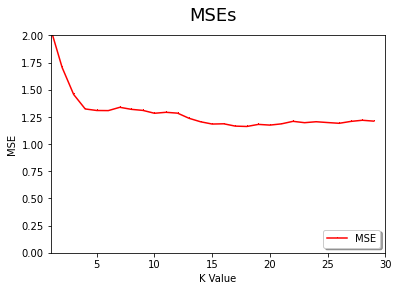

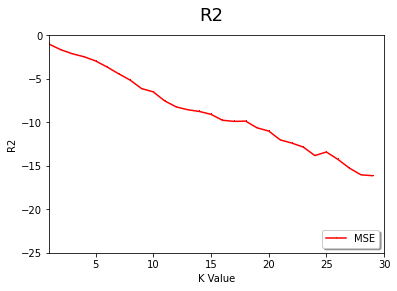

NN MSE: 1.1954137115839243
NN R2: -15.526445349985394


In [ ]:
# Execute your plan here (build and test your models to answer your question)

#Start with a knn for non-normal and normal
from sklearn import neighbors

series = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i)
  knn.fit(train_data, train_sln)
  knn_preds = knn.predict(test_data)
  val = metrics.mean_squared_error(knn_preds, test_sln)
  series.append(val)

series2 = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i)
  knn.fit(train_data, train_sln)
  knn_preds = knn.predict(test_data)
  val = metrics.r2_score(knn_preds, test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('MSEs', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, 0, 2])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('R2', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, -25, 0])
plt.show()




In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 4) #seems like 4 is best k value
knn.fit(train_data, train_sln)
knn_preds = knn.predict(test_data)
knn_mse = metrics.mean_squared_error(knn_preds, test_sln)
knn_r2 = metrics.r2_score(knn_preds, test_sln)

print("NN MSE:", knn_mse)
print("NN R2:", knn_r2)


NN MSE: 1.3231382978723405
NN R2: -2.4566486806120187


In [ ]:
predictors = Drake1.columns.drop('Points Scored')
target= 'Points Scored'

n_train_data, n_test_data, n_train_sln, n_test_sln = train_test_split(Drake1[predictors], Drake1[target], test_size = 0.2, random_state=110)



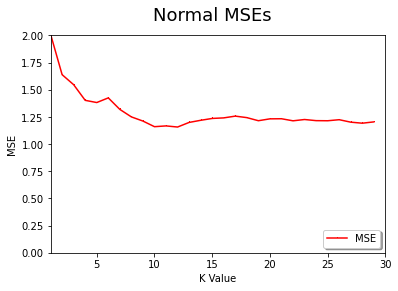

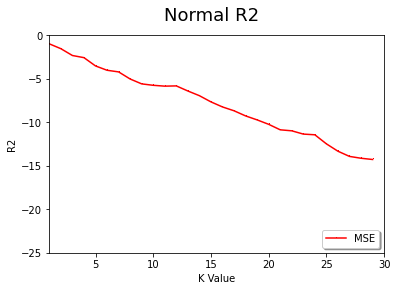

In [ ]:
series = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i)
  knn.fit(n_train_data, n_train_sln)
  knn_preds = knn.predict(n_test_data)
  val = metrics.mean_squared_error(knn_preds, test_sln)
  series.append(val)

series2 = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i)
  knn.fit(n_train_data, n_train_sln)
  knn_preds = knn.predict(n_test_data)
  val = metrics.r2_score(knn_preds, n_test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('Normal MSEs', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, 0, 2])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('Normal R2', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, -25, 0])
plt.show()

In [ ]:
normal_knn = neighbors.KNeighborsRegressor(n_neighbors = 10) #seems like 10 is the sweet spot for n
normal_knn.fit(n_train_data, n_train_sln)
knn_preds = knn.predict(n_test_data)
knn_mse = metrics.mean_squared_error(knn_preds, n_test_sln)
knn_r2 = metrics.r2_score(knn_preds, n_test_sln)

print("Normal MSE:", knn_mse)
print("Normal R2:", knn_r2)

Normal MSE: 1.2040377463505958
Normal R2: -14.27162868656732


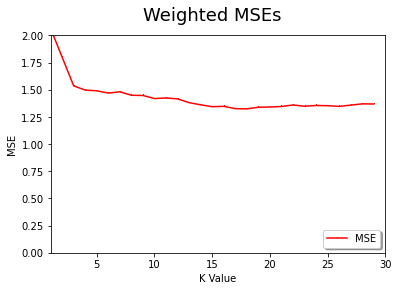

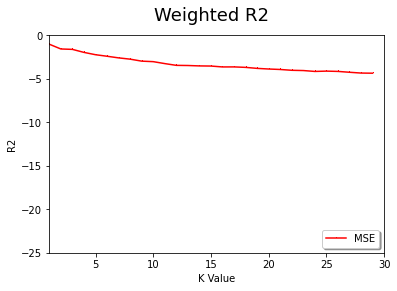

In [ ]:
series = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'distance')
  knn.fit(train_data, train_sln)
  knn_preds = knn.predict(test_data)
  val = metrics.mean_squared_error(knn_preds, test_sln)
  series.append(val)

series2 = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'distance')
  knn.fit(train_data, train_sln)
  knn_preds = knn.predict(test_data)
  val = metrics.r2_score(knn_preds, test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('Weighted MSEs', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, 0, 2])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('Weighted R2', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, -25, 0])
plt.show()


In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 16, weights = 'distance') #seems like 16 is best k value, gives lowest mse
knn.fit(train_data, train_sln)
knn_preds = knn.predict(test_data)
knn_mse = metrics.mean_squared_error(knn_preds, test_sln)
knn_r2 = metrics.r2_score(knn_preds, test_sln)

print("NN MSE:", knn_mse)
print("NN R2:", knn_r2)

NN MSE: 1.346915267989352
NN R2: -3.631026668096495


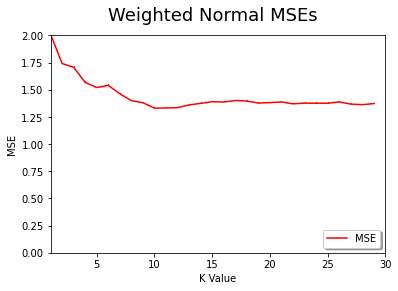

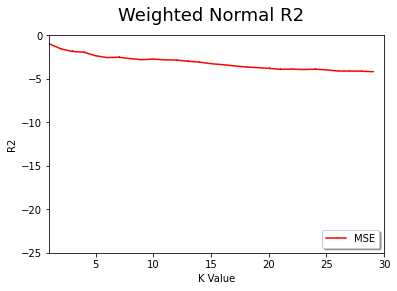

In [ ]:
series = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'distance')
  knn.fit(n_train_data, n_train_sln)
  knn_preds = knn.predict(n_test_data)
  val = metrics.mean_squared_error(knn_preds, test_sln)
  series.append(val)

series2 = []
for i in range(1,30):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'distance')
  knn.fit(n_train_data, n_train_sln)
  knn_preds = knn.predict(n_test_data)
  val = metrics.r2_score(knn_preds, n_test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('Weighted Normal MSEs', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, 0, 2])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 30)
plt.suptitle('Weighted Normal R2', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 30, -25, 0])
plt.show()

In [ ]:
normal_knn = neighbors.KNeighborsRegressor(n_neighbors = 10) #seems like 10 is the sweet spot for n
normal_knn.fit(n_train_data, n_train_sln)
knn_preds = knn.predict(n_test_data)
knn_mse = metrics.mean_squared_error(knn_preds, n_test_sln)
knn_r2 = metrics.r2_score(knn_preds, n_test_sln)

print("Normal MSE:", knn_mse)
print("Normal R2:", knn_r2)

Normal MSE: 1.3724981281895254
Normal R2: -4.1794177706747275


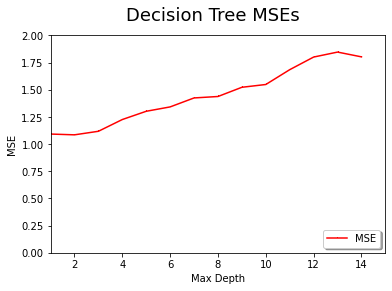

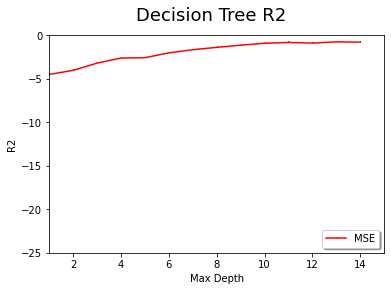

In [ ]:
x = 15
series = []
for i in range(1,x):
  dt = tree.DecisionTreeRegressor(max_depth = i)
  dt.fit(train_data, train_sln)
  dt_preds = dt.predict(test_data)
  val = metrics.mean_squared_error(dt_preds, test_sln)
  series.append(val)

series2 = []
for i in range(1,x):
  dt = tree.DecisionTreeRegressor(max_depth = i)
  dt.fit(train_data, train_sln)
  dt_preds = dt.predict(test_data)
  val = metrics.r2_score(dt_preds, test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Decision Tree MSEs', fontsize=18)
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, 0, 2])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Decision Tree R2', fontsize=18)
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, -25, 0])
plt.show()


In [ ]:
dt = tree.DecisionTreeRegressor(max_depth = 2)
dt.fit(train_data, train_sln)
dt_preds = dt.predict(test_data)
dt_mse = metrics.mean_squared_error(dt_preds, test_sln)
dt_r2 = metrics.r2_score(dt_preds, test_sln)
print("MSE:", dt_mse)
print("R2:", dt_r2)

MSE: 1.085053241676121
R2: -4.02211445991454


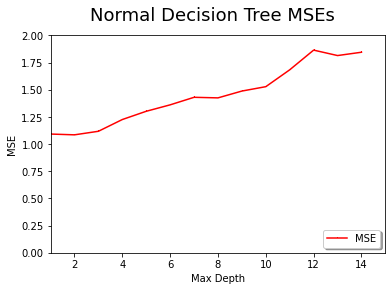

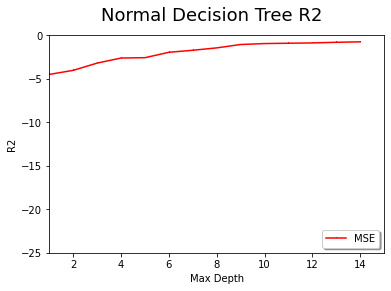

In [ ]:
x = 15
series = []
for i in range(1,x):
  dt = tree.DecisionTreeRegressor(max_depth = i)
  dt.fit(n_train_data, n_train_sln)
  dt_preds = dt.predict(n_test_data)
  val = metrics.mean_squared_error(dt_preds, n_test_sln)
  series.append(val)

series2 = []
for i in range(1,x):
  dt = tree.DecisionTreeRegressor(max_depth = i)
  dt.fit(n_train_data, n_train_sln)
  dt_preds = dt.predict(n_test_data)
  val = metrics.r2_score(dt_preds, n_test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Normal Decision Tree MSEs', fontsize=18)
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, 0, 2])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Normal Decision Tree R2', fontsize=18)
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, -25, 0])
plt.show()

In [ ]:
dt = tree.DecisionTreeRegressor(max_depth = 2)
dt.fit(n_train_data, n_train_sln)
dt_preds = dt.predict(n_test_data)
dt_mse = metrics.mean_squared_error(dt_preds, n_test_sln)
dt_r2 = metrics.r2_score(dt_preds, n_test_sln)
print("MSE:", dt_mse)
print("R2:", dt_r2)

MSE: 1.085053241676121
R2: -4.02211445991454


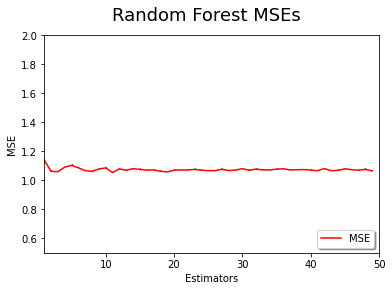

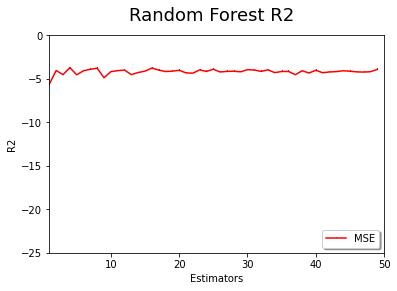

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x = 50
series = []
for i in range(1,x):
  forest = RandomForestRegressor(n_estimators = i, max_depth = 2)
  forest.fit(train_data, train_sln)
  forest_preds = forest.predict(test_data)
  val = metrics.mean_squared_error(forest_preds, test_sln)
  series.append(val)

series2 = []
for i in range(1,x):
  forest = RandomForestRegressor(n_estimators = i, max_depth = 2)
  forest.fit(train_data, train_sln)
  forest_preds = forest.predict(test_data)
  val = metrics.r2_score(forest_preds, test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Random Forest MSEs', fontsize=18)
plt.xlabel('Estimators')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .5, 2])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Random Forest R2', fontsize=18)
plt.xlabel('Estimators')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, -25, 0])
plt.show()

In [ ]:
forest = RandomForestRegressor(n_estimators = 11, max_depth = 2)
forest.fit(train_data, train_sln)
forest_preds = forest.predict(test_data)
forest_mse = metrics.mean_squared_error(forest_preds, test_sln)
forest_r2 = metrics.r2_score(forest_preds, test_sln)
print("MSE:", forest_mse)
print("R2:", forest_r2)

MSE: 1.0676202396273986
R2: -4.230319080659332


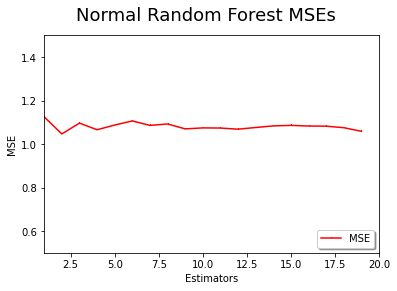

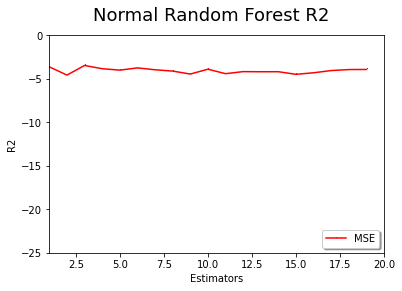

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x = 20
series = []
for i in range(1,x):
  forest = RandomForestRegressor(n_estimators = i, max_depth = 2)
  forest.fit(n_train_data, n_train_sln)
  forest_preds = forest.predict(n_test_data)
  val = metrics.mean_squared_error(forest_preds, n_test_sln)
  series.append(val)

series2 = []
for i in range(1,x):
  forest = RandomForestRegressor(n_estimators = i, max_depth = 2)
  forest.fit(n_train_data, n_train_sln)
  forest_preds = forest.predict(n_test_data)
  val = metrics.r2_score(forest_preds, n_test_sln)
  series2.append(val)  


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Normal Random Forest MSEs', fontsize=18)
plt.xlabel('Estimators')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .5, 1.5])
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Normal Random Forest R2', fontsize=18)
plt.xlabel('Estimators')
plt.ylabel('R2')
plt.plot(xvals, series2, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, -25, 0])
plt.show()

In [ ]:
forest = RandomForestRegressor(n_estimators = 2, max_depth = 2)
forest.fit(n_train_data, n_train_sln)
forest_preds = forest.predict(n_test_data)
forest_mse = metrics.mean_squared_error(forest_preds, n_test_sln)
forest_r2 = metrics.r2_score(forest_preds, n_test_sln)
print("MSE:", forest_mse)
print("R2:", forest_r2)

MSE: 1.0859545976079998
R2: -3.6359656752834963


# 8. Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

You should be able to fill in this table (but it doesn't count as a visualization): 

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |                    |                |                     |
| w-kNN         |                    |                |                     |
| decision tree |                    |                |                     |
| random forest |                    |                |                     |

In [ ]:
# Include code to show your results (graphs, etc)
#I showed all my graphs and code above in 7!! Sorry about that.

#I used a loop to create graphs to find the ideal k, max depth, and number of trees using the lowest MSE to choose. 
#The best model ended up being the non-normalized random forest with a max depth of 2 and 11 trees.

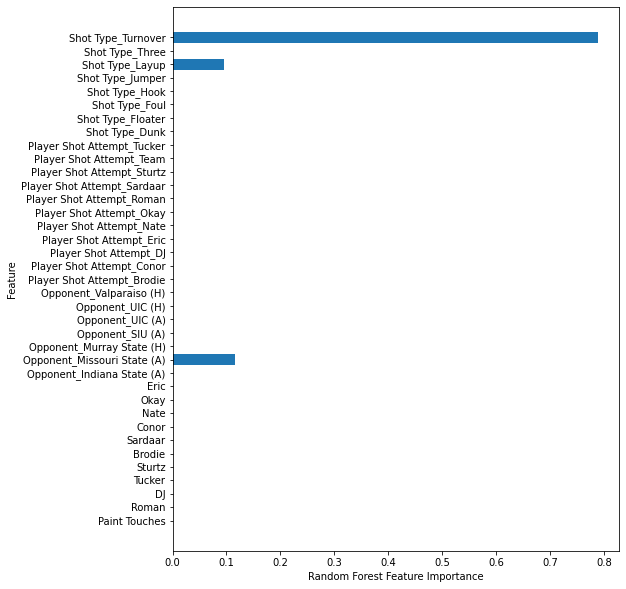

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

# 9. Bumps in the Road:
I've always found that I learn the most from these kinds of projects, and from where I get stuck. Keep track of these moments that you get stuck and chronicle them here: 

What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


A challenge I came into was normalizing all of the data. Only one of my predictor varibales was numeric, so I had to create dummy variables and make everything binary. I tried to manually normalize every column after this. I overcame this when you told me to just use a function to do this. This worked a lot faster.

# 10. Conclusions

You don't necessarily have to answer all of these questions, but include a discussion of what you learned from this project. Discussions may include: 
- What insights/recommendations do you have? 
- What did you find that was interesting? 
- Which model was your best model, which models didn't work well?
- Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.


#I think I need to use less variables. When I do this in R, I have an easier time picking apart variables. I thought of the whole project in terms of getting a result similar to the summary regression output in R packages. The results here just created the decisions based on some basic things like how a turnover will result in 0 points scored, or how a layup results in a much highest percentage change of scoring than other shot types. My goal was to see how our lineups and opponents effect our individual possessions, I should've only included those vairbales in my dataset. I didn't need paint touches, player shot attempt, or shot type.

#None of the models worked well because it's predicting extremely unpredictable data. I was more looking to see margins instead of accurately predicting outcomes. The point of this project was to predict outcome correctly, which isn't really possible for singular possesssions in basketball. The closest MSE I could get was just over 1.0. This is not good at all because the only choices for points scored in a possession is 0, 1, 2, and 3 (rare occassions 4). My best MSE only improved from the dummy by about 0.3. 

---

